# Feature engineering tips and theory

*This notebook contains Tips & Tricks for feature engineering. Mostly the theory that I've found interesting. Much of the inspiration comes from Solledad Galli.*

<div class="alert alert-block alert-warning"><b>1. Labels - cardinality and rare values</b></div>

- *The problem of cardinality - variables with high number of categories are overfitting the model and dominates over other variables. Mostly true in tree based methods.*
- *It's just good approach to reduce a high number of variables (for example 30 can be a lot, 4-5 is ok, but it depends), as always creating fast model and checking the difference between non reduced and reduced categorical variables can save a lot of time*
- *Rare labels - appearing only on train test or test set, in both cases we will end up with unbalanaced models. Therefore it's a good habit to bundle more of them to a new category or to assign them to the old ones based on most common connection.*

<div class="alert alert-block alert-warning"><b>2 Identification of outliers - most common approaches</b></div>

*Gaussian*

In [4]:
#Upper_boundary = data.X.mean() + 3* data.X.std()
#Lower_boundary = data.X.mean() - 3* data.X.std()

*IQR*

In [ ]:
#IQR = data.X.quantile(0.75) - X.Age.quantile(0.25)

#Lower_fence = data.X.quantile(0.25) - (IQR * 1.5)
#Upper_fence = data.X.quantile(0.75) + (IQR * 1.5)

*Extreme IQR*

In [5]:
#IQR = data.X.quantile(0.75) - X.Age.quantile(0.25)

#Lower_fence = X.Age.quantile(0.25) - (IQR * 3)
#Upper_fence = X.Age.quantile(0.75) + (IQR * 3)

***Most common models which are affected by outliers are Linear regression and Adaboost.***

*Sometimes it's just depends on data, and some advanced creativity is necessary. Very important is to find out why we have outliers in the first place and check if we don't have some special connections which can define a value of outlier better than methods above.* 

<div class="alert alert-block alert-warning"><b>3. Cheatsheet comparing machine learning models</b></div>

![Loss](ml_cheatsheet.png)

<div class="alert alert-block alert-warning"><b>4. Which models are affected by variable magnitudes and which are not?</b></div>

*Model which have to have scaled values:*

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines 
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)

*Model which works fine even with non scaled values:*

- Classification and Regression Trees
- Random Forests
- Gradient Boosted Trees

<div class="alert alert-block alert-warning"><b>5. Which algorithms assumes a linear relationship between variables and predictors?</b></div>

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

<div class="alert alert-block alert-warning"><b>6. How can we achieve a linear relationship between non linear variables and why to try at all? :)</b></div>

- Mathematical transformation of the variable
- Discretisation

*Linear models are making most precise prediction for regression tasks (continuous labels) and they are easy to interpret.*

<div class="alert alert-block alert-warning"><b>7. How can we check whether variable has some linear relationship with label?</b></div>

- making a prediction based on our variables
- determine and observing an error
- if the variable is explained by the variable we are evaluating, then the error should be random noise, typically following a normal distribution centered at 0

<div class="alert alert-block alert-warning"><b>8. Is Gaussian distribution of variable a MUST in machine learning?</b></div>

*For linear regression it is but for other models it's not, nevertheless even other models may benefit from Gaussian-like distributions (and very ofthen they do). Therefore it's good habbit make a transformation if it's possible.*

<div class="alert alert-block alert-warning"><b>9. What is a Q-Q Plot?</b></div>

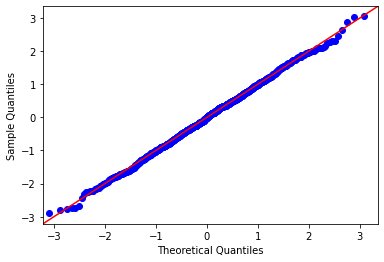

In [29]:
import numpy as np
import statsmodels.api as sm
import pylab
import pandas as pd
import ma

test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
pylab.show()

*Quantile-Quantile plot, is composed of a line of 45 degrees and our variable, the more the variable copies the theoretical line, the more Gaussian distribution it has. Bellow random exponential plot to show the difference.*

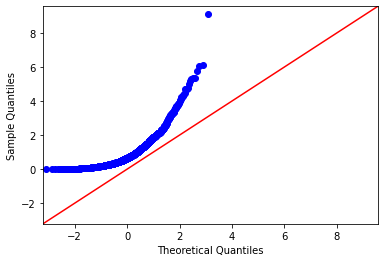

In [17]:
test2 = np.random.exponential(1, 1000)

sm.qqplot(test2, line='45')
pylab.show()

<div class="alert alert-block alert-warning"><b>10. What is CCA and when to use it?</b></div>

*Complete case analysis, deleting data with missing valus. Only if the data portion is small and there is no other way how to obtain missing values. In most cases is just better to look for better data source. But for fast "dirty" model it's a great option.*

<div class="alert alert-block alert-warning"><b>11. Mean, Median or Zeros?</b></div>

- Zeros only if they have meaning for data
- Mean is probably more suitable for Gaussian shape variable

*It always depends how much of our distribution we will lost. The example bellow is self-explanatory. Neither of the adjustments is able to copy original shape of the distribution of age.*

In [36]:
mmz = pd.read_csv('train_tit.csv')[['Age', 'Fare','Survived']]

In [49]:
def mmz_input(df, variable):
    df[variable+"_median"] = df[variable].fillna(df[variable].median())
    df[variable+"_zero"] = df[variable].fillna(0) 
    df[variable+"_mean"] = df[variable].fillna(df[variable].mean())
    return df

In [53]:
mmz_updated = mmz_input(mmz,"Age")

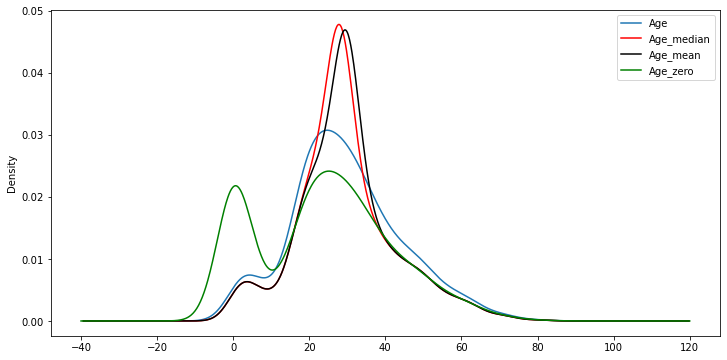

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(111)
mmz_updated['Age'].plot(kind='kde', ax=ax)
mmz_updated["Age_median"].plot(kind='kde', ax=ax, color='red')
mmz_updated["Age_mean"].plot(kind='kde', ax=ax, color='black')
mmz_updated["Age_zero"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

*I honestly consider simple mean and median as a lazy solution. It's better try to find some connection between variables and replace values in more meaningful way. Another approach how to improve performance of our model is to use groupby and calculate multiple means or medians.*

<div class="alert alert-block alert-warning"><b>12. What is random sample imputation?</b></div>

*Filling Nan values by randomly selecting values from another sample, but very often it performs worse than simple median, mean imputation. The only advantage is that it preserve the shape of the distribution. Bottom line: it's better to avoid this solution*

<div class="alert alert-block alert-warning"><b>13. Should we add meaning to missing values?</b></div>

*In other words, should we add another variables which add an importance for rows with Nan values? For smaller datasets it's probably okay. For larger ones it's probably not a good idea, because we are expanding the feature space and hence even the computational complexity.*

<div class="alert alert-block alert-warning"><b>14. Cheatsheet comparing missing value imputation methods - numerical variables</b></div>

![Loss](ml_cheatsheet2.jpg)

*We will ensure even greater performance of the model with a more complex procedure, but it already depends on individual cases.*

<div class="alert alert-block alert-warning"><b>15. What are most common ways of pre-processing outlier values?</b></div>

- Mean/median imputation or random sampling (simple)
- Discrestisation
- Discard the outliers: process also called Trimming (simple)
- Windsorization

<div class="alert alert-block alert-warning"><b>16. What is Discretisation?</b></div>

*Grouping continuous values to discrete ones. It is mostly used for outlier pre-processing.*

In [80]:
from sklearn.preprocessing import KBinsDiscretizer
#very nice preprocessing function :)

A = np.array([[24,0.2],[35,0.3],[74,0.4], [96,0.5],[2,0.6],[39,0.8]])
print(A)
enc = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
enc.fit(A)
print(enc.transform(A))

[[24.   0.2]
 [35.   0.3]
 [74.   0.4]
 [96.   0.5]
 [ 2.   0.6]
 [39.   0.8]]
[[0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]]


<div class="alert alert-block alert-warning"><b>17. What is Winsorization?</b> Aka Top-coding, bottom-coding and zero-coding</div>

- Top coding -> all values above a certain threshold will be reduced on it
- Bottom coding -> all values under a certain threshold will be increased on it
- Zero coding -> just threshold with value equal to zero, avoid negative values

In [90]:
from scipy.stats.mstats import winsorize

In [91]:
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])

In [92]:
winsorize(a, limits=[0.1, 0.2])

masked_array(data=[8, 4, 8, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

<div class="alert alert-block alert-warning"><b>18. How are we dealing with rare labels? </b></div>

- replacing with most frequent label
- grouping to new label (other, new etc.)

*It vary based on how many categories the data has, also there is no rule of thumb telling what number of categories is small or high.*

<div class="alert alert-block alert-warning"><b>19. What is possible disadvantage of one hot encoder?</b></div>

- expanding feature space

*Also it's necessary to decide whether we have nominal or ordinal variable. If we have a large number of variables, it's a good approach to limit the 10 most frequent labels of the variable. So we will just use most frequent and the rest pack to one "new" variable.*

<div class="alert alert-block alert-warning"><b>20. What is Target guided ordinal encoding?</b></div>

*Encoding variable so they have onotonicit relationship which means:*

- they have strong positive or negative corellation between each other

*Therefore they capture information within the label and are rendering more predictive features, but they can cause overfitting. We have more methods and these are:*

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence

<div class="alert alert-block alert-warning"><b>21. Ordering labels according to the target</b></div>

*The procedure is as follows:*

- calculate the mean of the target for label/category
- order the labels based on calculated means
- number them accordingly

*For this one better to show an example.*

In [98]:
data = pd.read_csv('train_tit.csv', usecols=['Cabin', 'Survived'])
data.Cabin.fillna('Missing', inplace=True)
#we are loading titanic data and filling Missing for Nan values for Survived column

In [100]:
data.head() #simple we have only survived and cabin

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [97]:
len(data.Cabin.unique()) #but we have a lot of cabins..148
#148 features is useless here, our options are
# reduce number of features - just letter M, C etc - nominal but something about 9 features
# reduce number of features - but not as nominal but as ordinal

148

In [101]:
data['Cabin'] = data['Cabin'].astype(str).str[0] #only first letter
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

*Now we want to order our values, based on means (counts would be fine also).*

In [103]:
ordered_labels = data.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [104]:
ordered_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [105]:
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

In [106]:
ordinal_label

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [107]:
data['Cabin_ordered'] = data["Cabin"].map(ordinal_label)

In [109]:
data.head()

,Survived,Cabin,Cabin_ordered
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


*Monotonic relationship between variables. Let's plot the difference.*

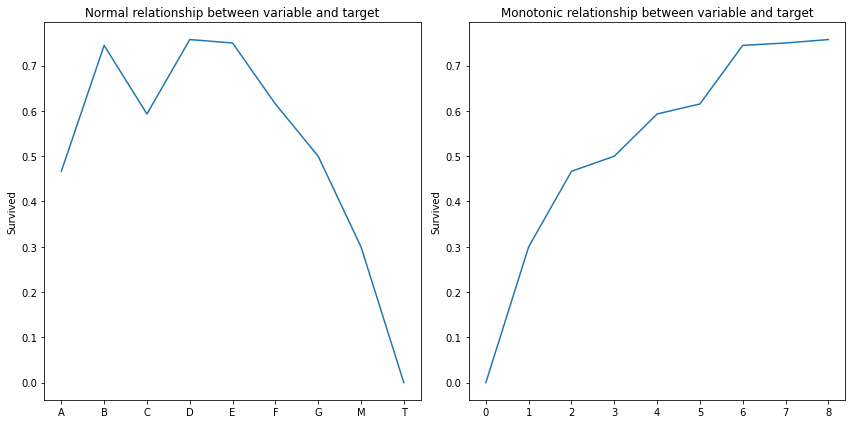

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Plots
axes[0].plot(data.groupby(['Cabin'])['Survived'].mean())
axes[1].plot(data.groupby(['Cabin_ordered'])['Survived'].mean())

#Labels
axes[1].set_title('Monotonic relationship between variable and target')
axes[1].set_ylabel('Survived')

axes[0].set_title('Normal relationship between variable and target')
axes[0].set_ylabel('Survived')

fig.tight_layout()

*As we can see, the second plot looks much better. Same values but with a little transformation we have more meaningful and much more consistent variable.*

<div class="alert alert-block alert-warning"><b>22. Replacing labels by the risk</b> AKA Mean encoding </div>

*Simply put, it's almost the same as the previous encoding but we will use only mean values and we wont be transforming them into whole numbers.*

In [126]:
data.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

*After this part we would just map our values on dataset and it's done.*

<div class="alert alert-block alert-warning"><b>23. Probability ratio encoding</b></div>

*For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the labels by that ratio.*

In [148]:
pb_survived = data.groupby(['Cabin'])['Survived'].mean()
pb_died = 1 - data.groupby(['Cabin'])['Survived'].mean()
pb_ratio = pb_survived / pb_died
pb_ratio

Cabin
A    0.875000
B    2.916667
C    1.458333
D    3.125000
E    3.000000
F    1.600000
G    1.000000
M    0.428274
T    0.000000
Name: Survived, dtype: float64

*And again we would just map the results and we are done.*

<div class="alert alert-block alert-warning"><b>24. Weight of evidence</b></div>

**Pro:**

- monotonic relationship to the dependent variable.
- It orders the categories on a "logistic" scale (good for logistic regression)
- the transformed variables are on the same scale and therefore we can determine which one is better predictor

**Cons:**

- does not take into account the correlation between independent variables
- over-fitting

*The calculation is almost similar to previous method, instead of just dividing our columns, we are dividing their logs.*

In [150]:
pb_survived = data.groupby(['Cabin'])['Survived'].mean()
pb_died = 1 - data.groupby(['Cabin'])['Survived'].mean()
pb_ratio = np.log(pb_survived / pb_died)
pb_ratio

Cabin
A   -0.133531
B    1.070441
C    0.377294
D    1.139434
E    1.098612
F    0.470004
G    0.000000
M   -0.847991
T        -inf
Name: Survived, dtype: float64

*So clearly if we are using log on our values, it will be well suited for logistic regression.*

<div class="alert alert-block alert-warning"><b>25. What scalers are available in Scikit and which one is best choice for skewed distribution?</b></div>

- NormalScaler
- MinMaxScaler
- StandardScaler
- RobusScaler

*For skewed distirbution is RobustScaler a great choice which is quantil scaler (IQR = 75th quantile - 25th quantile, X_scaled = (X - X.median) / IQR). But the rule of thumb here is just try all of them as hyperparameters.*

<div class="alert alert-block alert-warning"><b>26. How can we transform variable to achieve Gaussian-like distribution?</b></div>

- logarithmic transformation => np.log(variable)
- reciprocal transformation => 1/variable
- square root transformation => variable ** 1/2
- exponential transformation => variable ** X
- boxcox transformation => stats.boxcox(variable) , T(Y)=(Y exp(λ)−1)/λ
- info for boxcox: http://www.statisticshowto.com/box-cox-transformation/
- Rule of thumb? Probably best just to try them, plot histogram and Q-Q plot..and thats it

Also possibility use transformers:

In [153]:
# from feature_engine import variable_transformers as vt

<div class="alert alert-block alert-info"><b>Note:</b> create a function which will iterate through all of the possibilities and will evaluate best option itself</div>

<div class="alert alert-block alert-warning"><b>27. What is linearization?</b></div>

*Just transforming our variable from exponential to linear, reversing the process using log. Quick example bellow.*

In [162]:
import math
math_education = [math.exp(1), math.exp(2), math.exp(3), math.exp(4), math.exp(5)]
math_education

[2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766]

In [163]:
Y = [1,2,3,4,5]

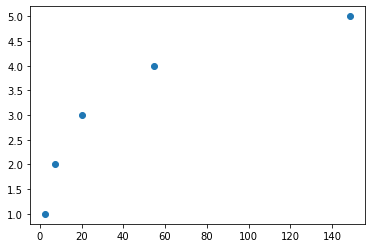

In [164]:
plt.scatter(math_education, Y)

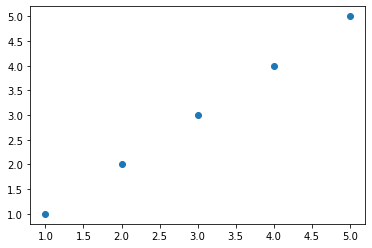

In [165]:
euler_log = np.log(math_education) 
plt.scatter(euler_log, Y)

<div class="alert alert-block alert-danger"><b>Everything for now...will be updated as soon as I 've found something new</b></div>

***The End***